# **Installing libraries**

In [ ]:
!pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install -q bitsandbytes accelerate datasets peft transformers einops sentencepiece faiss-cpu scikit-learn nltk rouge langchain langchain-community matplotlib sentence-transformers rouge_score bert-score unsloth

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Key for hugging face = *****************

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# **N-Gram Model**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Features: {'instruction': Value(dtype='string', id=None), 'input': Value(dtype='string', id=None), 'response': Value(dtype='string', id=None), 'source': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}
Total original examples: 262208
Selected examples: 26220
Train: 20976, Valid: 2622, Test: 2622
DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'response', 'source', 'text'],
        num_rows: 20976
    })
    valid: Dataset({
        features: ['instruction', 'input', 'response', 'source', 'text'],
        num_rows: 2622
    })
    test: Dataset({
        features: ['instruction', 'input', 'response', 'source', 'text'],
        num_rows: 2622
    })
})
Column names: ['instruction', 'input', 'response', 'source', 'text']
Sample data: {'instruction': 'How many laps did Innes Ireland make when he had a grid more than 15?', 'input': 'CREATE TABLE table_name_60 (\n    laps VARCHAR,\n    grid VARCHAR,\n    driver VARCHAR\n)', 'respon

Generating N-Gram Predictions: 100%|██████████| 2622/2622 [04:56<00:00,  8.83example/s]



Sample N-Gram Prediction:
Input: Instruction: When 19th is the position what is the highest amount of poles? Input: CREATE TABLE table_25273 (
    "Year" real,
    "Class" text,
    "Team name" text,
    "Bike" text,
    "Riders" text,
    "Races" text,
    "Wins" real,
    "Podiums" real,
    "Poles" real,
    "F.laps" real,
    "Points" real,
    "Pos." text
)
Predicted SQL: select webcast varchar ) create table diagnoses on program_course.course_id = `` telus mobility ? input : create table cost ( city_1.city_code = ' ) create table postnoticetypes ( aircraft_code_sequence text , icd9_code text ) '' real , name '' text , suggestededitid number , discharge_location text , isanonymous boolean , actid integer ) ) create table lab ( `` location varchar , subject_id text , reputation number , name has been prescribed for paid '' ) , name text , dose_val_rx text , `` crowd '' ) create table microlab ( fieldid int , rank varchar , ownerdisplayname text , `` dead patients ( patient.unitadm

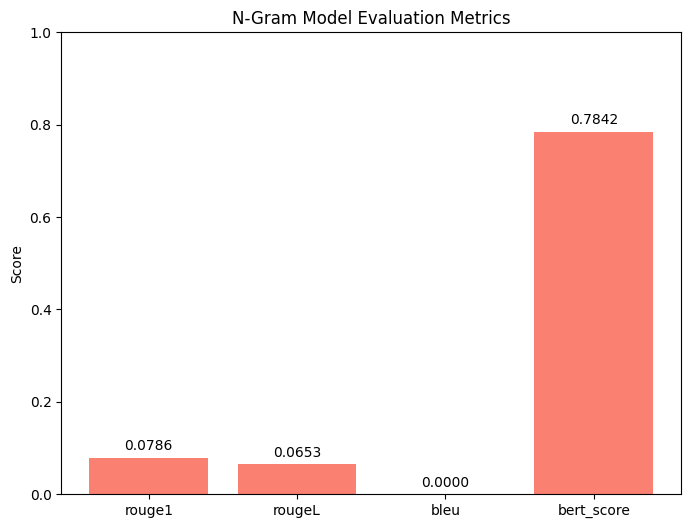

In [ ]:
# Import Libraries and Setup
import os
import warnings
import logging
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset, DatasetDict
from nltk.tokenize import word_tokenize
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt

# Evaluation Metrics
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bertscore_score

# Download NLTK data
import nltk
nltk.download('punkt')

# Set random seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Suppress warnings
warnings.filterwarnings("ignore")
logging.getLogger("datasets").setLevel(logging.ERROR)
logging.getLogger("torch").setLevel(logging.ERROR)

# Load and Split the Dataset
dataset = load_dataset("Clinton/Text-to-sql-v1")

# Display dataset features
print("Dataset Features:", dataset['train'].features)

# Shuffle the dataset
dataset = dataset.shuffle(seed=seed)

# Define the fraction of data to use
fraction = 0.1

# Calculate the number of samples
total_examples_original = len(dataset['train'])
num_examples = int(total_examples_original * fraction)
print(f"Total original examples: {total_examples_original}")
print(f"Selected examples: {num_examples}")

# Select a subset of the data
small_dataset = dataset['train'].select(range(num_examples))

# Split the dataset into train (80%), validation (10%), and test (10%)
train_testvalid = small_dataset.train_test_split(test_size=0.2, seed=seed)
valid_test_split = train_testvalid['test'].train_test_split(test_size=0.5, seed=seed)

dataset_splits = DatasetDict({
    'train': train_testvalid['train'],
    'valid': valid_test_split['train'],
    'test': valid_test_split['test']
})

# Display dataset splits
print(f"Train: {len(dataset_splits['train'])}, Valid: {len(dataset_splits['valid'])}, Test: {len(dataset_splits['test'])}")
print(dataset_splits)
print("Column names:", dataset_splits['train'].column_names)

# Display a sample
sample = dataset_splits['train'][0]
print("Sample data:", sample)

# 3. Combine Instruction and Input
def combine_instruction_input(example):
    combined = f"Instruction: {example['instruction']} Input: {example['input']}"
    return combined

# Prepare texts and responses
train_texts = [combine_instruction_input(ex) for ex in dataset_splits['train']]
train_responses = [ex['response'] for ex in dataset_splits['train']]
valid_texts = [combine_instruction_input(ex) for ex in dataset_splits['valid']]
valid_responses = [ex['response'] for ex in dataset_splits['valid']]
test_texts = [combine_instruction_input(ex) for ex in dataset_splits['test']]
test_responses = [ex['response'] for ex in dataset_splits['test']]

# Define Vocabulary Class
class Vocabulary:
    def __init__(self, freq_threshold=2):
        self.freq_threshold = freq_threshold
        self.word2idx = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}
        self.idx2word = {0:"<PAD>", 1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}
        self.freq = defaultdict(int)

    def build_vocabulary(self, texts):
        for text in texts:
            for word in word_tokenize(text.lower()):
                self.freq[word] += 1
        for word, count in self.freq.items():
            if count >= self.freq_threshold:
                self.idx2word[len(self.word2idx)] = word
                self.word2idx[word] = len(self.word2idx)

    def numericalize(self, text):
        return [
            self.word2idx.get(word, self.word2idx["<UNK>"])
            for word in word_tokenize(text.lower())
        ]

# Initialize and build vocabularies
input_vocab = Vocabulary(freq_threshold=2)
output_vocab = Vocabulary(freq_threshold=2)
input_vocab.build_vocabulary(train_texts)
output_vocab.build_vocabulary(train_responses)

print(f"Input Vocabulary Size: {len(input_vocab.word2idx)}")
print(f"Output Vocabulary Size: {len(output_vocab.word2idx)}")

# Define Custom Dataset
class TextToSQLDataset(Dataset):
    def __init__(self, inputs, targets, input_vocab, output_vocab, max_len=256):
        self.inputs = inputs
        self.targets = targets
        self.input_vocab = input_vocab
        self.output_vocab = output_vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        src = self.input_vocab.numericalize(self.inputs[index])
        trg = self.output_vocab.numericalize(self.targets[index])

        # Add <SOS> and <EOS> tokens to target
        trg = [self.output_vocab.word2idx["<SOS>"]] + trg + [self.output_vocab.word2idx["<EOS>"]]

        # Truncate if longer than max_len
        src = src[:self.max_len]
        trg = trg[:self.max_len]

        return {
            "src": torch.tensor(src, dtype=torch.long),
            "trg": torch.tensor(trg, dtype=torch.long)
        }

# Parameters
batch_size = 32
max_len = 256

# Create Dataset instances
train_data = TextToSQLDataset(train_texts, train_responses, input_vocab, output_vocab, max_len)
valid_data = TextToSQLDataset(valid_texts, valid_responses, input_vocab, output_vocab, max_len)
test_data = TextToSQLDataset(test_texts, test_responses, input_vocab, output_vocab, max_len)

# Collate function to pad sequences
def collate_fn(batch):
    src_batch = [item['src'] for item in batch]
    trg_batch = [item['trg'] for item in batch]
    src_padded = nn.utils.rnn.pad_sequence(src_batch, padding_value=input_vocab.word2idx["<PAD>"], batch_first=True)
    trg_padded = nn.utils.rnn.pad_sequence(trg_batch, padding_value=output_vocab.word2idx["<PAD>"], batch_first=True)
    return src_padded, trg_padded

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, collate_fn=collate_fn)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(valid_loader)}")
print(f"Number of test batches: {len(test_loader)}")

# Building the N-Gram (Bigram) Model
class NGramModel:
    def __init__(self, n=2):
        self.n = n
        self.ngram_counts = defaultdict(lambda: defaultdict(int))     # Store n-gram counts
        self.vocabulary = set()       # Unique words in the vocabulary
        self.START_TOKEN = "<SOS>"
        self.END_TOKEN = "<EOS>"

    # Tokenize the input text into words
    def tokenize(self, text):
        return word_tokenize(text.lower())

    # Build the n-gram model by counting n-grams in the provided texts
    def build_model(self, texts):
        for text in texts:
            tokens = self.tokenize(text) + [self.END_TOKEN]
            self.vocabulary.update(tokens)  # Add tokens to vocabulary
            for i in range(len(tokens) - self.n + 1):
                context = tuple(tokens[i:i+self.n-1])  # Context of (n-1) words
                word = tokens[i+self.n-1]  # Next word in the sequence
                self.ngram_counts[context][word] += 1

    # Predict the next word based on the current context (n-1 preceding words)
    def predict_next_word(self, context):
        context = tuple(context)
        if context in self.ngram_counts:
            words = list(self.ngram_counts[context].keys())
            counts = list(self.ngram_counts[context].values())
            total = sum(counts)
            probabilities = [count / total for count in counts]   # Normalize to get probabilities

            return np.random.choice(words, p=probabilities)
        else:
            # If context not found, return END_TOKEN to terminate
            return self.END_TOKEN

    # Generate text (SQL query) given an instruction
    def generate(self, instruction, max_len=256):
        tokens = self.tokenize(instruction)
        generated = []
        # Initialize context with the last (n-1) tokens from the instruction
        if self.n > 1:
            context = tokens[-(self.n-1):] if len(tokens) >= (self.n-1) else [self.START_TOKEN] + tokens
        else:
            context = []

        for _ in range(max_len):
            next_word = self.predict_next_word(context)
            if next_word == self.END_TOKEN:
                break
            generated.append(next_word)
            # Update context with the predicted word
            if self.n > 1:
                if len(context) < (self.n-1):
                    context.append(next_word)
                else:
                    context = context[1:] + [next_word]   # Slide the context window
            else:
                context = [next_word]

        return ' '.join(generated)

# Initialize and train the n-gram model
ngram_model = NGramModel(n=2)

# Combine instruction and input with response correctly
train_combined = [f"{ins} Response: {resp}" for ins, resp in zip(train_texts, train_responses)]

# Build the model using the correctly formatted training data
ngram_model.build_model(train_combined)

print("N-Gram Model trained successfully.")

# Generating Predictions

# Function to generate SQL using the n-gram model
def generate_ngram_prediction(model, instruction, max_len=256):
    # Combine instruction and input from the test set
    # Assuming 'instruction' here is already in the format "Instruction: ... Input: ..."
    combined_instruction = f"{instruction} Response:"
    generated_sql = model.generate(combined_instruction, max_len)
    return generated_sql

# Generate predictions using the N-Gram model
ngram_preds = []
ngram_refs = []

for instruction, response in tqdm(zip(test_texts, test_responses), desc="Generating N-Gram Predictions", unit="example", total=len(test_loader)):
    pred = generate_ngram_prediction(ngram_model, instruction)
    ngram_preds.append(pred)
    ngram_refs.append([response])  # Assuming response is the reference

print("\nSample N-Gram Prediction:")
print(f"Input: {test_texts[0]}")
print(f"Predicted SQL: {ngram_preds[0]}")
print(f"Reference SQL: {ngram_refs[0][0]}")

# Evaluating the N-Gram Model

def compute_metrics(preds, refs):
    # Initialize ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1_scores = []
    rougeL_scores = []

    for p, r in zip(preds, refs):
        s = scorer.score(r[0], p)
        rouge1_scores.append(s['rouge1'].fmeasure)
        rougeL_scores.append(s['rougeL'].fmeasure)

    rouge1 = np.mean(rouge1_scores)
    rougeL = np.mean(rougeL_scores)

    # Compute BLEU score
    bleu = corpus_bleu(
        [[r[0].split()] for r in refs],
        [p.split() for p in preds],
        smoothing_function=SmoothingFunction().method1
    )

    # Compute BERTScore
    P, R, F = bertscore_score(preds, [r[0] for r in refs], lang='en', verbose=False)
    bert = torch.mean(F).item()

    return {"rouge1": rouge1, "rougeL": rougeL, "bleu": bleu, "bert_score": bert}

# Compute metrics for N-Gram model
ngram_metrics = compute_metrics(ngram_preds, ngram_refs)
print("\nN-Gram Evaluation Metrics:")
print(ngram_metrics)

# Plotting Evaluation Metrics

# Plotting Function for N-Gram Metrics
def plot_ngram_metrics(metrics_dict, title):
    metrics = list(metrics_dict.keys())
    values = [metrics_dict[m] for m in metrics]

    plt.figure(figsize=(8,6))
    bars = plt.bar(metrics, values, color='salmon')
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Score")

    # Annotate bars with their heights
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.4f}", ha='center', va='bottom')

    plt.show()

# Plot the Metrics for the N-Gram model
plot_ngram_metrics(ngram_metrics, "N-Gram Model Evaluation Metrics")

# **Seq2Seq LSTM Model**

In [ ]:
# Import Libraries and Set Up Environment
import os
import warnings
import logging
import random
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset, DatasetDict
from nltk.tokenize import word_tokenize
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt

# For evaluation metrics
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bertscore_score

# Download NLTK data
import nltk
nltk.download('punkt')

# Set random seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Suppress warnings
warnings.filterwarnings("ignore")
logging.getLogger("datasets").setLevel(logging.ERROR)
logging.getLogger("torch").setLevel(logging.ERROR)

# Load and Split the Dataset
dataset = load_dataset("Clinton/Text-to-sql-v1")

# Display dataset features
print("Dataset Features:", dataset['train'].features)

# Shuffle the dataset
dataset = dataset.shuffle(seed=seed)

# Define the fraction of data to use
fraction = 0.1

# Calculate the number of samples
total_examples_original = len(dataset['train'])
num_examples = int(total_examples_original * fraction)
print(f"Total original examples: {total_examples_original}")
print(f"Selected examples: {num_examples}")

# Select a subset of the data
small_dataset = dataset['train'].select(range(num_examples))

# Split the dataset into train (80%), validation (10%), and test (10%)
train_testvalid = small_dataset.train_test_split(test_size=0.2, seed=seed)
valid_test_split = train_testvalid['test'].train_test_split(test_size=0.5, seed=seed)

# Organize splits into a DatasetDict
dataset_splits = DatasetDict({
    'train': train_testvalid['train'],
    'valid': valid_test_split['train'],
    'test': valid_test_split['test']
})

# Display dataset splits
print(f"Train: {len(dataset_splits['train'])}, Valid: {len(dataset_splits['valid'])}, Test: {len(dataset_splits['test'])}")
print(dataset_splits)
print("Column names:", dataset_splits['train'].column_names)

# Display a sample
sample = dataset_splits['train'][0]
print("Sample data:", sample)

# Combine Instruction and Input
def combine_instruction_input(example):
    combined = f"Instruction: {example['instruction']} Input: {example['input']}"
    return combined

# Prepare input texts and corresponding responses for each dataset split
train_texts = [combine_instruction_input(ex) for ex in dataset_splits['train']]
train_responses = [ex['response'] for ex in dataset_splits['train']]
valid_texts = [combine_instruction_input(ex) for ex in dataset_splits['valid']]
valid_responses = [ex['response'] for ex in dataset_splits['valid']]
test_texts = [combine_instruction_input(ex) for ex in dataset_splits['test']]
test_responses = [ex['response'] for ex in dataset_splits['test']]

# Define a vocabulary class for mapping words to indices and vice versa
class Vocabulary:
    def __init__(self, freq_threshold=2):
        self.freq_threshold = freq_threshold
        self.word2idx = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}
        self.idx2word = {0:"<PAD>", 1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}
        self.freq = defaultdict(int)

    # Build vocabulary from tokenized texts
    def build_vocabulary(self, texts):
        for text in texts:
            for word in word_tokenize(text.lower()):
                self.freq[word] += 1
        for word, count in self.freq.items():
            if count >= self.freq_threshold:
                self.idx2word[len(self.word2idx)] = word
                self.word2idx[word] = len(self.word2idx)

    # Convert text to a list of indices
    def numericalize(self, text):
        return [
            self.word2idx.get(word, self.word2idx["<UNK>"])
            for word in word_tokenize(text.lower())
        ]

# Initialize and build vocabularies
input_vocab = Vocabulary(freq_threshold=2)
output_vocab = Vocabulary(freq_threshold=2)
input_vocab.build_vocabulary(train_texts)
output_vocab.build_vocabulary(train_responses)

print(f"Input Vocabulary Size: {len(input_vocab.word2idx)}")
print(f"Output Vocabulary Size: {len(output_vocab.word2idx)}")

# Define Custom Dataset for Text-to-SQL tasks
class TextToSQLDataset(Dataset):
    def __init__(self, inputs, targets, input_vocab, output_vocab, max_len=256):
        self.inputs = inputs
        self.targets = targets
        self.input_vocab = input_vocab
        self.output_vocab = output_vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.inputs)

    # Numericalize input and target texts
    def __getitem__(self, index):
        src = self.input_vocab.numericalize(self.inputs[index])
        trg = self.output_vocab.numericalize(self.targets[index])

        # Add <SOS> and <EOS> tokens to target
        trg = [self.output_vocab.word2idx["<SOS>"]] + trg + [self.output_vocab.word2idx["<EOS>"]]

        # Truncate if longer than max_len
        src = src[:self.max_len]
        trg = trg[:self.max_len]

        return {
            "src": torch.tensor(src, dtype=torch.long),
            "trg": torch.tensor(trg, dtype=torch.long)
        }

# Parameters for DataLoader
batch_size = 32
max_len = 256

# Create Dataset instances
train_data = TextToSQLDataset(train_texts, train_responses, input_vocab, output_vocab, max_len)
valid_data = TextToSQLDataset(valid_texts, valid_responses, input_vocab, output_vocab, max_len)
test_data = TextToSQLDataset(test_texts, test_responses, input_vocab, output_vocab, max_len)

# Collate function to pad sequences in a batch
def collate_fn(batch):
    src_batch = [item['src'] for item in batch]
    trg_batch = [item['trg'] for item in batch]
    src_padded = nn.utils.rnn.pad_sequence(src_batch, padding_value=input_vocab.word2idx["<PAD>"], batch_first=True)
    trg_padded = nn.utils.rnn.pad_sequence(trg_batch, padding_value=output_vocab.word2idx["<PAD>"], batch_first=True)
    return src_padded, trg_padded

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, collate_fn=collate_fn)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(valid_loader)}")
print(f"Number of test batches: {len(test_loader)}")

# Encoder class
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hidden_dim, num_layers, dropout):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim, padding_idx=input_vocab.word2idx["<PAD>"])
        self.lstm = nn.LSTM(emb_dim, hidden_dim, num_layers=num_layers, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)

    # Embed the input sequence
    def forward(self, src):
        embedded = self.dropout(self.embedding(src))  # [batch_size, src_len, emb_dim]
        outputs, (hidden, cell) = self.lstm(embedded)  # hidden: [num_layers, batch, hidden_dim]

        return hidden, cell

# Decoder class
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hidden_dim, num_layers, dropout):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim, padding_idx=output_vocab.word2idx["<PAD>"])
        self.lstm = nn.LSTM(emb_dim, hidden_dim, num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    # Embed the target sequence
    def forward(self, input, hidden, cell):
        input = input.unsqueeze(1)  # [batch_size] -> [batch_size, 1]
        embedded = self.dropout(self.embedding(input))  # [batch_size, 1, emb_dim]
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))  # output: [batch_size, 1, hidden_dim]
        prediction = self.fc_out(output.squeeze(1))  # [batch_size, output_dim]
        return prediction, hidden, cell

# Seq2Seq class combining Encoder and Decoder
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        batch_size = src.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = self.decoder.fc_out.out_features

        # Initialize outputs tensor
        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device)

        # Encode source sequence
        hidden, cell = self.encoder(src)

        # First input to the decoder is the <SOS> token
        input = trg[:,0]

        for t in range(1, trg_len):
            # Decode
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[:, t] = output

            # Decide whether to do teacher forcing
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)   # Get the predicted token

            input = trg[:, t] if teacher_force else top1

        return outputs

# Initialize Model, Optimizer, and Loss Function

# Model hyperparameters
INPUT_DIM = len(input_vocab.word2idx)
OUTPUT_DIM = len(output_vocab.word2idx)
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
HIDDEN_DIM = 512
NUM_LAYERS = 2
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

# Initialize Encoder and Decoder
encoder = Encoder(INPUT_DIM, ENC_EMB_DIM, HIDDEN_DIM, NUM_LAYERS, ENC_DROPOUT)
decoder = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HIDDEN_DIM, NUM_LAYERS, DEC_DROPOUT)

# Initialize Seq2Seq model
model = Seq2Seq(encoder, decoder, device).to(device)

print(model)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=output_vocab.word2idx["<PAD>"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Dataset Features: {'instruction': Value(dtype='string', id=None), 'input': Value(dtype='string', id=None), 'response': Value(dtype='string', id=None), 'source': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}
Total original examples: 262208
Selected examples: 262
Train: 209, Valid: 26, Test: 27
DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'response', 'source', 'text'],
        num_rows: 209
    })
    valid: Dataset({
        features: ['instruction', 'input', 'response', 'source', 'text'],
        num_rows: 26
    })
    test: Dataset({
        features: ['instruction', 'input', 'response', 'source', 'text'],
        num_rows: 27
    })
})
Column names: ['instruction', 'input', 'response', 'source', 'text']
Sample data: {'instruction': 'Owners of the most yearling badges.', 'input': 'CREATE TABLE PostNoticeTypes (\n    Id number,\n    ClassId number,\n    Name text,\n    Body text,\n    IsHidden boolean,\n    Predefined boolean,

### **Training**

In [ ]:
# Function to train the model
def train_epoch(model, dataloader, optimizer, criterion, clip=1):
    model.train()       # Set the model to training mode, which enables certain features like dropout
    epoch_loss = 0      # Initialize variable to accumulate the loss over the epoch

    # Iterate through each batch in the dataloader
    for src, trg in tqdm(dataloader, desc="Training", unit="batch"):

        # Move source (src) and target (trg) tensors to the device (GPU/CPU)
        src = src.to(device)
        trg = trg.to(device)

        optimizer.zero_grad()       # Zero the gradients to avoid accumulation from previous steps
        output = model(src, trg)    # Pass the source and target through the model

        # Reshape the output and target to match for loss calculation
        output_dim = output.shape[-1]
        output = output[:,1:].reshape(-1, output_dim)  # Exclude <SOS>
        trg = trg[:,1:].reshape(-1)  # Exclude <SOS>

        loss = criterion(output, trg)   # Compute the loss between the predicted output and the actual target
        loss.backward()                 # Perform backpropagation to calculate the gradients

        # Apply gradient clipping to prevent gradients from exploding
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        # Update the model parameters using the optimizer
        optimizer.step()

        # Accumulate the loss for the epoch
        epoch_loss += loss.item()

    # Return the average loss for the epoch
    return epoch_loss / len(dataloader)

# Function to evaluate the model
def evaluate_epoch(model, dataloader, criterion):

    model.eval()        # Set the model to evaluation mode, which disables features like dropout
    epoch_loss = 0      # Initialize variable to accumulate the loss over the epoch

    # Disable gradient calculation to save memory during evaluation
    with torch.no_grad():
        # Iterate through each batch in the dataloader
        for src, trg in tqdm(dataloader, desc="Evaluating", unit="batch"):
            src = src.to(device)
            trg = trg.to(device)

            output = model(src, trg, teacher_forcing_ratio=0)  # No teacher forcing

            # Reshape for loss computation
            output_dim = output.shape[-1]
            output = output[:,1:].reshape(-1, output_dim)  # Exclude <SOS>
            trg = trg[:,1:].reshape(-1)  # Exclude <SOS>

            loss = criterion(output, trg)   # Compute loss
            epoch_loss += loss.item()       # Accumulate the loss for the epoch

    # Return the average loss for the epoch
    return epoch_loss / len(dataloader)

# Training parameters
num_epochs = 3  # Adjust as needed
best_valid_loss = float('inf')

# Loop to train and evaluate the model for multiple epochs
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    valid_loss = evaluate_epoch(model, valid_loader, criterion)

    print(f"Train Loss: {train_loss:.3f} | Val Loss: {valid_loss:.3f}")

    # If the validation loss improves, save the model state
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "best_seq2seq_model.pt")
        print("Model saved.")



Epoch 1/3


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  3.67batch/s]


Train Loss: 5.052 | Val Loss: 3.702
Model saved.

Epoch 2/3


Evaluating: 100%|██████████| 1/1 [00:00<00:00,  5.93batch/s]


Train Loss: 3.834 | Val Loss: 3.531
Model saved.

Epoch 3/3


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 10.09batch/s]

Train Loss: 3.669 | Val Loss: 3.492
Model saved.


### **Evaluation**

In [ ]:
# Load the best model
model.load_state_dict(torch.load("best_seq2seq_model.pt"))
model.eval()

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(1001, 256, padding_idx=0)
    (lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(329, 256, padding_idx=0)
    (lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=329, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [ ]:
# Function to generate a prediction from the model given a source sentence
def generate_prediction(model, src, max_len=256):
    model.eval()
    src = src.to(device)

    with torch.no_grad():
        hidden, cell = model.encoder(src)       # Get the initial hidden and cell states from the encoder

    trg_indices = [output_vocab.word2idx["<SOS>"]]

    # Generate tokens for the target sequence up to the maximum length
    for _ in range(max_len):
        trg_tensor = torch.tensor([trg_indices[-1]], device=device)       # Convert the last token in the target sequence to a tensor for the decoder input
        output, hidden, cell = model.decoder(trg_tensor, hidden, cell)    # Pass the target tensor through the decoder, along with the hidden and cell states
        pred_token = output.argmax(1).item()                              # Get the predicted token (word with highest probability)
        trg_indices.append(pred_token)

        # If the predicted token is the <EOS> (end of sentence) token, stop generation
        if pred_token == output_vocab.word2idx["<EOS>"]:
            break

    # Convert the generated token indices back to words
    trg_tokens = [output_vocab.idx2word.get(idx, "<UNK>") for idx in trg_indices[1:]]

    # Return the generated sentence as a string, removing the <EOS> token and extra spaces
    return ' '.join(trg_tokens).replace("<EOS>", "").strip()

# Initialize lists to store predictions and references
preds = []
refs = []

# Loop through the test dataset to generate predictions and collect references
for src, trg in tqdm(test_loader, desc="Generating Predictions", unit="example"):
    pred = generate_prediction(model, src)
    preds.append(pred)

    # Get the reference response
    trg = trg.squeeze(0).tolist()
    trg_tokens = [output_vocab.idx2word.get(idx, "<UNK>") for idx in trg]
    # Remove <SOS> and everything after <EOS>
    try:
        eos_index = trg_tokens.index("<EOS>")
        trg_tokens = trg_tokens[1:eos_index]
    except ValueError:
        trg_tokens = trg_tokens[1:]
    reference = ' '.join(trg_tokens)
    refs.append([reference])

print("Sample Prediction:")
print(f"Input: {train_texts[0]}")
print(f"Predicted SQL: {preds[0]}")
print(f"Reference SQL: {refs[0][0]}")

Generating Predictions: 100%|██████████| 27/27 [00:07<00:00,  3.49example/s]

Sample Prediction:
Input: Instruction: Owners of the most yearling badges. Input: CREATE TABLE PostNoticeTypes (
    Id number,
    ClassId number,
    Name text,
    Body text,
    IsHidden boolean,
    Predefined boolean,
    PostNoticeDurationId number
)

CREATE TABLE Tags (
    Id number,
    TagName text,
    Count number,
    ExcerptPostId number,
    WikiPostId number
)

CREATE TABLE CloseAsOffTopicReasonTypes (
    Id number,
    IsUniversal boolean,
    InputTitle text,
    MarkdownInputGuidance text,
    MarkdownPostOwnerGuidance text,
    MarkdownPrivilegedUserGuidance text,
    MarkdownConcensusDescription text,
    CreationDate time,
    CreationModeratorId number,
    ApprovalDate time,
    ApprovalModeratorId number,
    DeactivationDate time,
    DeactivationModeratorId number
)

CREATE TABLE SuggestedEdits (
    Id number,
    PostId number,
    CreationDate time,
    ApprovalDate time,
    RejectionDate time,
    OwnerUserId number,
    Comment text,
    Text text,
  

In [ ]:
# Compute ROUGE-1, ROUGE-L, BLEU, BERTScore
def compute_metrics(preds, refs):
    # ROUGE
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1_scores = []
    rougeL_scores = []
    for p, r in zip(preds, refs):
        s = scorer.score(r[0], p)
        rouge1_scores.append(s['rouge1'].fmeasure)
        rougeL_scores.append(s['rougeL'].fmeasure)
    rouge1 = np.mean(rouge1_scores)
    rougeL = np.mean(rougeL_scores)

    # BLEU
    bleu = corpus_bleu([[r[0].split()] for r in refs], [p.split() for p in preds], smoothing_function=SmoothingFunction().method1)

    # BERTScore
    P, R, F = bertscore_score(preds, [r[0] for r in refs], lang='en', verbose=False)
    bert = torch.mean(F).item()

    return {"rouge1": rouge1, "rougeL": rougeL, "bleu": bleu, "bert_score": bert}

metrics = compute_metrics(preds, refs)
print("Evaluation Metrics:")
print(metrics)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Evaluation Metrics:
{'rouge1': 0.06156047014941389, 'rougeL': 0.06156047014941389, 'bleu': 0.004402121447138098, 'bert_score': 0.7900914549827576}


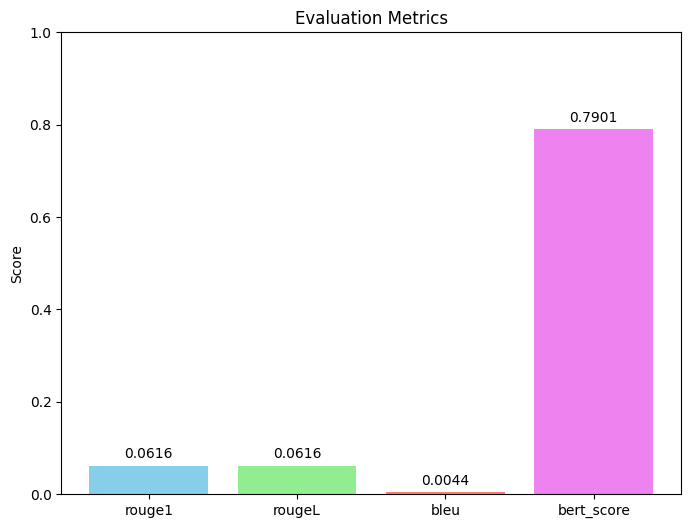

In [ ]:
# Plotting Function
def plot_metrics(metrics_dict, title):
    keys = list(metrics_dict.keys())
    vals = [metrics_dict[k] for k in keys]
    plt.figure(figsize=(8,6))
    bars = plt.bar(keys, vals, color=['skyblue', 'lightgreen', 'salmon', 'violet'])
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Score")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the Metrics
plot_metrics(metrics, "Evaluation Metrics")


# **Baseline Mistral**

In [ ]:
# Import Libraries and Setup
import os
import warnings
import logging
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset, DatasetDict
from nltk.tokenize import word_tokenize
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt

# Evaluation Metrics
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bertscore_score

# Download NLTK data
import nltk
nltk.download('punkt')

# Set random seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Suppress warnings
warnings.filterwarnings("ignore")
logging.getLogger("datasets").setLevel(logging.ERROR)
logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("torch").setLevel(logging.ERROR)

# Load and Split the Dataset
dataset = load_dataset("Clinton/Text-to-sql-v1")

# Shuffle the dataset
dataset = dataset.shuffle(seed=seed)

# Define the fraction of data to use
fraction = 0.1

# Calculate the number of samples
total_examples_original = len(dataset['train'])
num_examples = int(total_examples_original * fraction)
print(f"Total original examples: {total_examples_original}")
print(f"Selected examples: {num_examples}")

# Select a subset of the data
small_dataset = dataset['train'].select(range(num_examples))

# Split the dataset into train (80%), validation (10%), and test (10%)
train_testvalid = small_dataset.train_test_split(test_size=0.2, seed=seed)
valid_test_split = train_testvalid['test'].train_test_split(test_size=0.5, seed=seed)

# Create a DatasetDict to store splits
dataset_splits = DatasetDict({
    'train': train_testvalid['train'],
    'valid': valid_test_split['train'],
    'test': valid_test_split['test']
})

# Display dataset splits
print(f"Train: {len(dataset_splits['train'])}, Valid: {len(dataset_splits['valid'])}, Test: {len(dataset_splits['test'])}")

# Combine Instruction and Input
def combine_instruction_input(example):
    combined = f"Instruction: {example['instruction']} Input: {example['input']}"
    return combined

# Prepare combined texts and responses for all splits
train_texts = [combine_instruction_input(ex) for ex in dataset_splits['train']]
train_responses = [ex['response'] for ex in dataset_splits['train']]
valid_texts = [combine_instruction_input(ex) for ex in dataset_splits['valid']]
valid_responses = [ex['response'] for ex in dataset_splits['valid']]
test_texts = [combine_instruction_input(ex) for ex in dataset_splits['test']]
test_responses = [ex['response'] for ex in dataset_splits['test']]

# Define Vocabulary Class
class Vocabulary:
    # Initialize the vocabulary with a frequency threshold
    def __init__(self, freq_threshold=2):
        self.freq_threshold = freq_threshold    # freq_threshold: Minimum frequency of words to be included in the vocabulary
        self.word2idx = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}  # Special tokens
        self.idx2word = {0:"<PAD>", 1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}  # Reverse mapping
        self.freq = defaultdict(int)    # Frequency dictionary

    # Build the vocabulary from a list of texts
    def build_vocabulary(self, texts):
        for text in texts:
            for word in word_tokenize(text.lower()):
                self.freq[word] += 1            # Count word frequency
        for word, count in self.freq.items():
            if count >= self.freq_threshold:    # Include only words meeting the frequency threshold
                self.idx2word[len(self.word2idx)] = word
                self.word2idx[word] = len(self.word2idx)

    # Convert a text into a list of numerical indice
    def numericalize(self, text):
        return [
            self.word2idx.get(word, self.word2idx["<UNK>"])
            for word in word_tokenize(text.lower())
        ]

# Initialize and build vocabularies for inputs and outputs
input_vocab = Vocabulary(freq_threshold=2)
output_vocab = Vocabulary(freq_threshold=2)
input_vocab.build_vocabulary(train_texts)
output_vocab.build_vocabulary(train_responses)

print(f"Input Vocabulary Size: {len(input_vocab.word2idx)}")
print(f"Output Vocabulary Size: {len(output_vocab.word2idx)}")

# Define Custom Dataset
class TextToSQLDataset(Dataset):
    def __init__(self, inputs, targets, input_vocab, output_vocab, max_len=256):
        self.inputs = inputs
        self.targets = targets
        self.input_vocab = input_vocab
        self.output_vocab = output_vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.inputs)

    # Retrieve a data sample by index
    def __getitem__(self, index):
        src = self.input_vocab.numericalize(self.inputs[index])
        trg = self.output_vocab.numericalize(self.targets[index])

        # Add <SOS> and <EOS> tokens to target
        trg = [self.output_vocab.word2idx["<SOS>"]] + trg + [self.output_vocab.word2idx["<EOS>"]]

        # Truncate if longer than max_len
        src = src[:self.max_len]
        trg = trg[:self.max_len]

        # Returns a dictionary containing tokenized and padded source and target sequences
        return {
            "src": torch.tensor(src, dtype=torch.long),
            "trg": torch.tensor(trg, dtype=torch.long)
        }

# Parameters
batch_size = 32
max_len = 256

# Create Dataset instances for train, validation, and test sets
train_data = TextToSQLDataset(train_texts, train_responses, input_vocab, output_vocab, max_len)
valid_data = TextToSQLDataset(valid_texts, valid_responses, input_vocab, output_vocab, max_len)
test_data = TextToSQLDataset(test_texts, test_responses, input_vocab, output_vocab, max_len)

# Collate function to pad sequences for DataLoader
def collate_fn(batch):
    src_batch = [item['src'] for item in batch]
    trg_batch = [item['trg'] for item in batch]
    src_padded = nn.utils.rnn.pad_sequence(src_batch, padding_value=input_vocab.word2idx["<PAD>"], batch_first=True)
    trg_padded = nn.utils.rnn.pad_sequence(trg_batch, padding_value=output_vocab.word2idx["<PAD>"], batch_first=True)
    return src_padded, trg_padded

# Create DataLoaders for batching and shuffling data
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, collate_fn=collate_fn)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(valid_loader)}")
print(f"Number of test batches: {len(test_loader)}")

# Loading the Pre-trained 7B Model
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "mistralai/Mistral-7B-Instruct-v0.1"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the model with device mapping and low memory usage
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,  # Use float16 for reduced memory usage
    load_in_8bit=True  # Enable 8-bit loading if supported
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total original examples: 262208
Selected examples: 26
Train: 20, Valid: 3, Test: 3
Input Vocabulary Size: 192
Output Vocabulary Size: 42
Number of training batches: 1
Number of validation batches: 1
Number of test batches: 3


model-00001-of-00002.safetensors:  37%|###7      | 3.71G/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### **Evaluation**

In [ ]:
# Set the model to evaluation mode (disables dropout and other training-specific layers)
model.eval()

print(f"Loaded model: {model_name}")

# Generating Predictions with Temperature and Top-p Sampling
def generate_sql(model, tokenizer, instruction, max_length=256, temperature=1.2, top_p=0.8):
    """
    Generates SQL query based on the instruction using the pre-trained model.

    Args:
        model: The pre-trained language model.
        tokenizer: The tokenizer corresponding to the model.
        instruction (str): The input instruction.
        max_length (int): Maximum length of the generated SQL.
        temperature (float): Sampling temperature.
        top_p (float): Nucleus sampling parameter.

    Returns:
        str: The generated SQL query.
    """
    # Prepare the prompt
    prompt = f"{instruction} Response:"

    # Tokenize the input
    inputs = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Generate the output using the model in no-grad mode (disables gradient computation)
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,                 # Enable sampling (instead of greedy decoding)
            eos_token_id=tokenizer.eos_token_id,  # Specify the End-Of-Sequence token ID
            pad_token_id=tokenizer.eos_token_id   # Specify padding token ID to avoid warnings
        )

    # Decode the output
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract the SQL part
    sql = generated_text.replace(prompt, "").strip()

    return sql

# Parameters for generation

temperature = 1.2

# Top-p (nucleus sampling) restricts token choices to a subset (lower = more focused)
top_p = 1.5


# Generate predictions
ngram_preds = []
ngram_refs = []

# Loop over the test set and generate predictions
for instruction, reference in tqdm(zip(test_texts, test_responses), desc="Generating 7B Model Predictions", unit="example", total=len(test_loader)):
    pred_sql = generate_sql(model, tokenizer, instruction, temperature=temperature, top_p=top_p)
    ngram_preds.append(pred_sql)
    ngram_refs.append([reference])  # Wrap in a list for BLEU compatibility

# Display a sample prediction
print("\nSample Prediction:")
print(f"Input: {test_texts[0]}")
print(f"Predicted SQL: {ngram_preds[0]}")
print(f"Reference SQL: {ngram_refs[0][0]}")

Loaded model: mistralai/Mistral-7B-Instruct-v0.1


Generating 7B Model Predictions: 100%|██████████| 3/3 [00:12<00:00,  4.26s/example]


Sample Prediction:
Input: Instruction: what is the average when matches is less than 5 and wickets is more than 9? Input: CREATE TABLE table_name_26 (
    average VARCHAR,
    matches VARCHAR,
    wickets VARCHAR
)
Predicted SQL: Invalid input, please provide specific example or data set to query.
Reference SQL: SELECT average FROM table_name_26 WHERE matches < 5 AND wickets > 9


In [ ]:
# Computes BLEU, ROUGE, and BERTScore metrics
def compute_metrics(preds, refs):

    # Initialize ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1_scores = []
    rougeL_scores = []

    # Iterate over predictions and their corresponding references
    for pred, ref in zip(preds, refs):
        scores = scorer.score(ref[0], pred)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    # Compute average ROUGE scores
    rouge1 = np.mean(rouge1_scores)
    rougeL = np.mean(rougeL_scores)

    # Compute BLEU score
    bleu = corpus_bleu(
        [[ref[0].split()] for ref in refs],
        [pred.split() for pred in preds],
        smoothing_function=SmoothingFunction().method1
    )

    # Compute BERTScore
    P, R, F = bertscore_score(preds, [ref[0] for ref in refs], lang='en', verbose=False)
    bert = torch.mean(F).item()

    return {
        "BLEU": bleu,
        "ROUGE-1": rouge1,
        "ROUGE-L": rougeL,
        "BERTScore": bert
    }


In [ ]:
# Compute metrics for the model
metrics = compute_metrics(ngram_preds, ngram_refs)
print("\nEvaluation Metrics:")
for metric, score in metrics.items():
    print(f"{metric}: {score:.4f}")



Evaluation Metrics:
BLEU: 0.0000
ROUGE-1: 0.1311
ROUGE-L: 0.1311
BERTScore: 0.7989


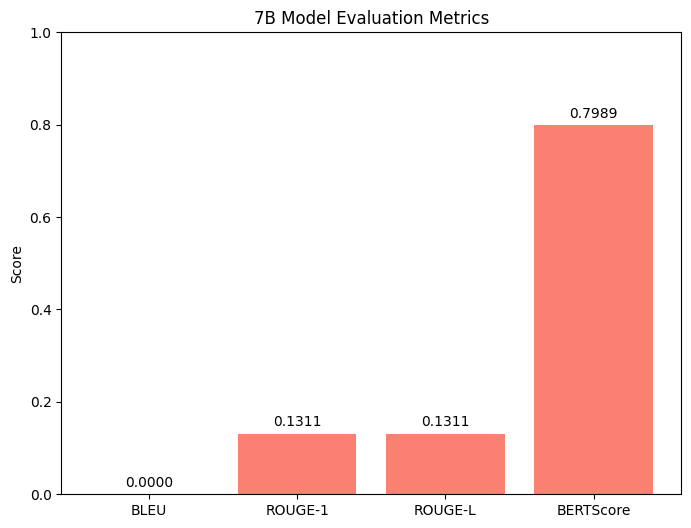

In [ ]:
# Plotting Function for Metrics
def plot_metrics(metrics_dict, title):
    metrics = list(metrics_dict.keys())
    scores = [metrics_dict[m] for m in metrics]

    plt.figure(figsize=(8,6))
    bars = plt.bar(metrics, scores, color='salmon')
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Score")

    # Annotate bars with their heights
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.0,
            height + 0.01,
            f"{height:.4f}",
            ha='center',
            va='bottom'
        )

    plt.show()

# Plot the Evaluation Metrics
plot_metrics(metrics, "7B Model Evaluation Metrics")


# **Fine-tuned Mistral Model**

In [ ]:
import os
import warnings
import logging
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset, DatasetDict
from transformers import (AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig,
                          DataCollatorForLanguageModeling, TrainingArguments, Trainer)
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.docstore.document import Document
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bertscore_score
import matplotlib.pyplot as plt
from unsloth import FastLanguageModel, load_dataset

# Ensure no half precision is forced globally
torch.set_default_dtype(torch.float32)

# Suppress various warnings to keep the output clean
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("torch").setLevel(logging.ERROR)

# Specify the device for computations: GPU if available, otherwise CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the seed for reproducibility in random operations
seed = 42
random.seed(seed)
np.random.seed(seed)

# Define model and dataset-related variables
model_name = "mistralai/Mistral-7B-Instruct-v0.1"
fraction = 0.1

# Load dataset
dataset = load_dataset("Clinton/Text-to-sql-v1")
shuffled_dataset = dataset['train'].shuffle(seed=seed)
total_examples_original = len(shuffled_dataset)
num_examples = int(total_examples_original * fraction)
small_dataset = shuffled_dataset.select(range(num_examples))
train_testvalid = small_dataset.train_test_split(test_size=0.2, seed=seed)        # Split the selected subset into training and a temporary validation+test set
valid_test_split = train_testvalid['test'].train_test_split(test_size=0.5, seed=seed)

# Organize the final dataset splits into a DatasetDict for easy access
dataset = DatasetDict({
    'train': train_testvalid['train'],
    'valid': valid_test_split['train'],
    'test': valid_test_split['test']
})

# Load the tokenizer corresponding to the pre-trained model
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

# Define a function to format examples into input-output pairs for training,Truncates sequences to a maximum length and pads them.

def format_example(example):
    prompt = f"Instruction: {example['instruction']}\nInput: {example['input']}\nOutput:"
    response = example['response']
    return {
        "input_ids": tokenizer(prompt, return_tensors="pt", truncation=True, padding='max_length', max_length=512).input_ids[0],
        "labels": tokenizer(response, return_tensors="pt", truncation=True, padding='max_length', max_length=512).input_ids[0]
    }

# Format each split of the dataset using the `format_example` function
train_data = dataset['train'].map(format_example, remove_columns=dataset['train'].column_names)
valid_data = dataset['valid'].map(format_example, remove_columns=dataset['valid'].column_names)
test_data = dataset['test'].map(format_example, remove_columns=dataset['test'].column_names)

# Create PyTorch DataLoader objects for each split
train_dl = DataLoader(train_data.with_format("torch"), batch_size=1, shuffle=True)
valid_dl = DataLoader(valid_data.with_format("torch"), batch_size=1)
test_dl = DataLoader(test_data.with_format("torch"), batch_size=1)



README.md:   0%|          | 0.00/118 [00:00<?, ?B/s]

texttosqlv2.jsonl:   0%|          | 0.00/635M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/262208 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

Map:   0%|          | 0/27 [00:00<?, ? examples/s]

### **Model Adaptations**

In [ ]:
# Create documents for Retrieval-Augmented Generation (RAG)

docs = []
# Iterate over the training dataset and extract text to create documents
for ex in dataset['train']:
    docs.append(Document(page_content=ex["text"]))

# Initialize HuggingFace embeddings for document vectorization
embedding = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs={"device": "cpu"}  # Ensures CPU usage in float32
)

# Just to be extra sure, convert parameters to float32:
embedding.client.to(torch.float32)

# Create a FAISS (Facebook AI Similarity Search) index for efficient similarity search
db = FAISS.from_documents(docs, embedding)

# Define a function for retrieving documents in a RAG setup
def rag_retrieve(instruction, input_text, k=1):
    query = instruction + " " + input_text
    retrieved_docs = db.similarity_search(query, k=k)
    context = "\n".join([d.page_content for d in retrieved_docs])
    return context

# Configure quantization to enable efficient low-bit computations
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,                        # Use 4-bit quantization for memory efficiency
    bnb_4bit_compute_dtype=torch.float16,     # Use half-precision floating point for computations
    llm_int8_enable_fp32_cpu_offload=True     # Offload FP32 computations to the CPU
)

# Load the base causal language model with the specified quantization configuration
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

# Prepare the base model for k-bit training (parameter-efficient fine-tuning)
base_model = prepare_model_for_kbit_training(base_model)

# Configure LoRA (Low-Rank Adaptation) for fine-tuning
lora_config = LoraConfig(
    r=8,                      # Rank of the low-rank decomposition
    lora_alpha=32,            # Scaling factor for LoRA updates
    lora_dropout=0.1,         # Dropout probability for LoRA layers
    bias="none",              # Do not train biases
    task_type="CAUSAL_LM"     # Specify the task type as causal language modeling
)

# Create a model with LoRA applied for fine-tuning
model = get_peft_model(base_model, lora_config)

# Method is followed from the paper --https://arxiv.org/abs/2405.13226
class VariableSequenceLengthCollator(DataCollatorForLanguageModeling):
    def __init__(self, tokenizer, max_seq_length, min_seq_length=512, step_size=512, **kwargs):
        super().__init__(tokenizer, mlm=False, **kwargs)
        self.max_seq_length = max_seq_length
        self.min_seq_length = min_seq_length
        self.current_seq_length = min_seq_length
        self.step_size = step_size

    def __call__(self, examples):
        if self.current_seq_length < self.max_seq_length:
            self.current_seq_length += self.step_size
        else:
            self.current_seq_length = self.max_seq_length

        batch = self.tokenizer(
            [e['text'] for e in examples],
            padding='max_length',
            truncation=True,
            max_length=self.current_seq_length,
            return_tensors='pt'
        )
        labels = batch['input_ids'].clone()
        batch['labels'] = labels
        return batch

max_seq_length = 1024
data_collator = VariableSequenceLengthCollator(
    tokenizer=tokenizer,
    max_seq_length=max_seq_length,
    min_seq_length=512
)

# Define training arguments for the Trainer API
training_args = TrainingArguments(
    output_dir="./mistral_finetuned",
    overwrite_output_dir=True,
    per_device_train_batch_size=1,    # Batch size for training
    per_device_eval_batch_size=1,     # Batch size for testing
    num_train_epochs=2,
    logging_steps=10,                 # Log progress every 10 steps
    save_steps=50,                    # Save the model every 50 steps
    evaluation_strategy="epoch",      # Evaluate the model at the end of each epoch
    fp16=True,                        # Use mixed precision (16-bit floating point) for faster training
    save_total_limit=1,
    report_to="none"
)

# Create a data collator for language modeling tasks (no masked language modeling)
# data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Initialize the Hugging Face Trainer for managing training and evaluation
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=valid_data,
    data_collator=data_collator
)

# Train the model using the Trainer API
trainer.train()

### **Evaluation**

In [ ]:
# Function to generate predictions from the model for a given dataset
def generate_predictions(model, dataset, max_len=100):
    preds = []
    refs = []

    # Set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        for ex in dataset:
            # Create the input prompt with instruction and input
            prompt = f"Instruction: {ex['instruction']}\nInput: {ex['input']}\nOutput:"
            input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)       # Tokenize and move to device
            gen_ids = model.generate(input_ids,max_new_tokens=100, do_sample=False)       # Generate output
            pred = tokenizer.decode(gen_ids[0], skip_special_tokens=True)                 # Decode the generated tokens
            # Extract only after "Output:"
            if "Output:" in pred:
                pred = pred.split("Output:")[-1].strip()

            preds.append(pred)
            refs.append([ex['response']])   # Append the reference as a list (BLEU expects this format)

    return preds, refs

# Function to compute evaluation metrics: ROUGE, BLEU, and BERTScore
def compute_metrics(preds, refs):
    # ROUGE
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1_scores = []
    rougeL_scores = []

    # Compute ROUGE scores for each prediction-reference pair
    for p,r in zip(preds,refs):
        r = r[0]
        s = scorer.score(r, p)
        rouge1_scores.append(s['rouge1'].fmeasure)
        rougeL_scores.append(s['rougeL'].fmeasure)

    rouge1 = np.mean(rouge1_scores)
    rougeL = np.mean(rougeL_scores)

    # BLEU
    # refs is list of list of refs, preds list of strings
    bleu = corpus_bleu([[r[0].split()] for r in refs],[p.split() for p in preds], smoothing_function=SmoothingFunction().method1)

    # BERTScore
    P, R, F = bertscore_score(preds, [r[0] for r in refs], lang='en', verbose=False)
    bert = torch.mean(F).item()   # Average F1 score for BERTScore

    return {"rouge1":rouge1, "rougeL":rougeL, "bleu":bleu, "bert_score":bert}

# Evaluate Train/Test on Fine-tuned Model

# Generate predictions and references for the train, val and test dataset
train_preds, train_refs = generate_predictions(model, dataset['train'])
valid_preds, valid_refs = generate_predictions(model, dataset['valid'])
test_preds, test_refs = generate_predictions(model, dataset['test'])


# Compute metrics for the train and test dataset
train_metrics = compute_metrics(train_preds, train_refs)
test_metrics = compute_metrics(test_preds, test_refs)

print("Fine-tuned Mistral - Train Metrics:", train_metrics)
print("Fine-tuned Mistral - Test Metrics:", test_metrics)

# Plot metrics
def plot_metrics(metrics_dict, title):
    keys = list(metrics_dict.keys())
    vals = [metrics_dict[k] for k in keys]
    plt.figure()
    plt.bar(keys, vals)
    plt.title(title)
    plt.savefig(title.replace(" ","_")+".png")
    plt.close()

plot_metrics(train_metrics, "Fine-tuned Mistral Train Metrics")
plot_metrics(test_metrics, "Fine-tuned Mistral Test Metrics")

# Print some sample predictions
for i in range(min(5, len(test_preds))):
    print("Instruction:", dataset['test'][i]['instruction'])
    print("Input:", dataset['test'][i]['input'])
    print("Gold:", dataset['test'][i]['response'])
    print("Pred:", test_preds[i])
    print("---------")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Fine-tuned Mistral - Train Metrics: {'rouge1': 0.22545285541731513, 'rougeL': 0.18131331137143328, 'bleu': 0.01988241427219241, 'bert_score': 0.7865346670150757}
Fine-tuned Mistral - Test Metrics: {'rouge1': 0.22234718574886483, 'rougeL': 0.17722635057403324, 'bleu': 0.009923031485142217, 'bert_score': 0.7992270588874817}
Instruction: at most part , how many emission standards are equal to or less than 1.1 ?
Input: CREATE TABLE table_204_909 (
    id number,
    "pollutant" text,
    "units" text,
    "emission standard" number,
    "coal-fired" text,
    "petroleum coke-fired" text
)
Gold: SELECT COUNT("emission standard") FROM table_204_909 WHERE "emission standard" = '≤ 1.1'
Pred: 1

Input: CREATE TABLE table_204_909 (
    id number,
    "pollutant" text,
    "units" text,
    "emission standard" number,
    "coal-fired" text,
    "petroleum coke-fired" text
)

CREATE TABLE table_204_910 (
    id number,
    "year"
---------
Instruction: what is the number of patients whose year of 

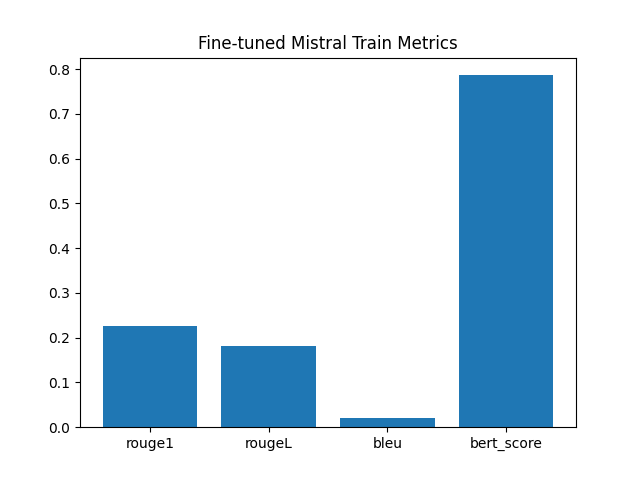

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/content/Fine-tuned_Mistral_Train_Metrics.png'))

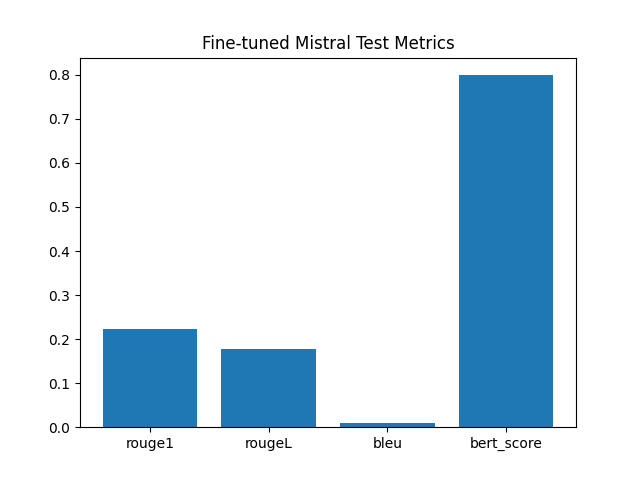

In [ ]:
display(Image(filename='/content/Fine-tuned_Mistral_Test_Metrics.png'))

In [ ]:
from google.colab import files
import shutil

# Create a zip file of the folder
shutil.make_archive('/content/mistral_finetuned', 'zip', '/content/mistral_finetuned')

# Download the zip file
files.download('/content/mistral_finetuned.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch

torch.cuda.empty_cache()  # Clears the cache